In [ ]:
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving SAT_GPA.csv to SAT_GPA.csv


In [ ]:
sg = pd.read_csv('SAT_GPA.csv')

In [ ]:
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

sg.describe()

,SAT_Scores,GPA
count,200.000000,200.000000
mean,491.810000,2.849500
std,174.893834,0.541076
min,202.000000,2.000000
25%,349.750000,2.400000
50%,480.500000,2.800000
75%,641.500000,3.400000
max,797.000000,3.900000


In [ ]:
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

<BarContainer object of 200 artists>

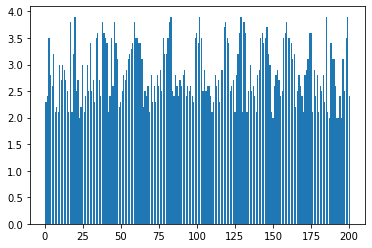

In [ ]:
plt.bar(height = sg.GPA, x = np.arange(1, 201, 1))


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6cdb6e450>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6cdb1fa10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6cdb79bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6cdad0d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6cd905150>],
 'means': []}

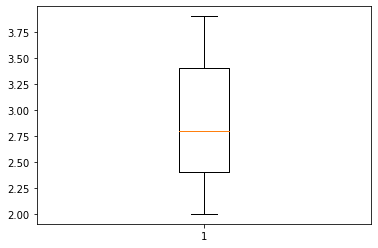

In [ ]:
plt.boxplot(sg.GPA) #boxplot

(array([23., 14., 34., 28., 25., 14.,  9., 28., 11., 14.]),
 array([2.  , 2.19, 2.38, 2.57, 2.76, 2.95, 3.14, 3.33, 3.52, 3.71, 3.9 ]),
 <a list of 10 Patch objects>)

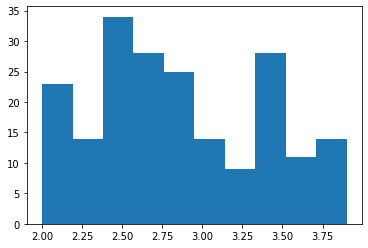

In [ ]:
plt.hist(sg.GPA) #histogram

<BarContainer object of 200 artists>

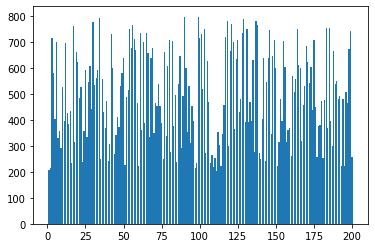

In [ ]:
plt.bar(height = sg.SAT_Scores, x = np.arange(1, 201, 1))

(array([26., 17., 21., 19., 24., 17., 17., 20., 20., 19.]),
 array([202. , 261.5, 321. , 380.5, 440. , 499.5, 559. , 618.5, 678. ,
        737.5, 797. ]),
 <a list of 10 Patch objects>)

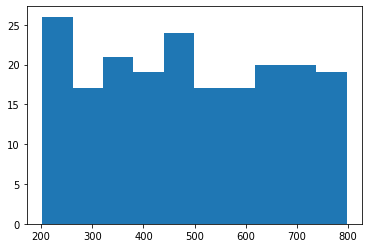

In [ ]:
plt.hist(sg.SAT_Scores) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc6ccc00c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6ccc05710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc6ccc00650>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6ccc0b210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6ccc0b750>],
 'means': []}

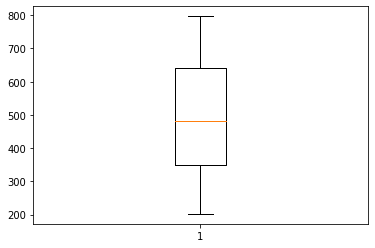

In [ ]:
plt.boxplot(sg.SAT_Scores) #boxplot

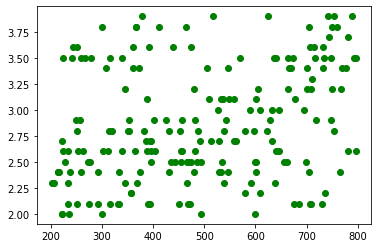

In [ ]:
# Scatter plot
plt.scatter(x = sg['SAT_Scores'], y = sg['GPA'], color = 'green') 

In [ ]:
# correlation
np.corrcoef(sg.SAT_Scores, sg.GPA) 

array([[1.        , 0.29353828],
       [0.29353828, 1.        ]])

In [ ]:
# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(sg.SAT_Scores, sg.GPA)[0, 1]

In [ ]:
cov_output

27.777793969849263

In [ ]:
sg.cov()

,SAT_Scores,GPA
SAT_Scores,30587.853166,27.777794
GPA,27.777794,0.292764


In [ ]:
# Import library
import statsmodels.formula.api as smf

In [ ]:
# Simple Linear Regression
model = smf.ols('GPA ~ SAT_Scores', data = sg).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.67
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           2.46e-05
Time:                        10:55:42   Log-Likelihood:                -151.44
No. Observations:                 200   AIC:                             306.9
Df Residuals:                     198   BIC:                             313.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4029      0.110     21.908      0.000       2.187       2.619
SAT_Scores     0.0009      0.000      4.321      0.000       0.000       0.001
==============================================================================
Omnibus:                       12.519   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.558
Skew:                           0.317   Prob(JB):                       0.0228
Kurtosis:                       2.290   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred1 = model.predict(pd.DataFrame(sg['SAT_Scores']))

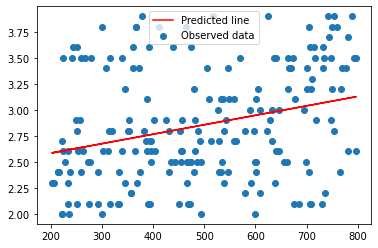

In [ ]:
# Regression Line
plt.scatter(sg.SAT_Scores, sg.GPA)
plt.plot(sg.SAT_Scores, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [ ]:
# Error calculation
res1 = sg.GPA - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

0.5159457227723684

array([[1.        , 0.27771976],
       [0.27771976, 1.        ]])

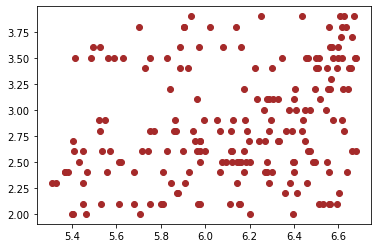

In [ ]:
######### Model building on Transformed Data
# Log Transformation
# x = log(waist); y = at

plt.scatter(x = np.log(sg['SAT_Scores']), y = sg['GPA'], color = 'brown')
np.corrcoef(np.log(sg.SAT_Scores), sg.GPA) #correlation

In [ ]:
model2 = smf.ols('GPA ~ np.log(SAT_Scores)', data = sg).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     16.55
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           6.85e-05
Time:                        10:56:41   Log-Likelihood:                -152.42
No. Observations:                 200   AIC:                             308.8
Df Residuals:                     198   BIC:                             315.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4796      0.584      0.822      0.412      -0.672       1.631
np.log(SAT_Scores)     0.3868      0.095      4.068      0.000       0.199       0.574
==============================================================================
Omnibus:                       15.866   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.435
Skew:                           0.320   Prob(JB):                       0.0147
Kurtosis:                       2.224   Cond. No.                         99.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred2 = model2.predict(pd.DataFrame(sg['SAT_Scores']))

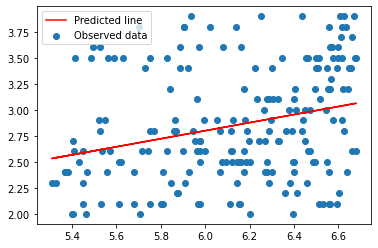

In [ ]:
# Regression Line
plt.scatter(np.log(sg.SAT_Scores), sg.GPA)
plt.plot(np.log(sg.SAT_Scores), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [ ]:
# Error calculation
res2 = sg.GPA - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

0.518490410108067

array([[1.        , 0.29408419],
       [0.29408419, 1.        ]])

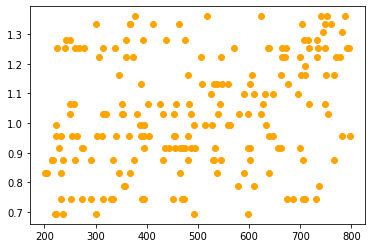

In [ ]:
#### Exponential transformation
# x = waist; y = log(at)

plt.scatter(x = sg['SAT_Scores'], y = np.log(sg['GPA']), color = 'orange')
np.corrcoef(sg.SAT_Scores, np.log(sg.GPA)) #correlation

In [ ]:
model3 = smf.ols('np.log(GPA) ~ SAT_Scores', data = sg).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.75
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           2.37e-05
Time:                        10:57:46   Log-Likelihood:                 58.615
No. Observations:                 200   AIC:                            -113.2
Df Residuals:                     198   BIC:                            -106.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8727      0.038     22.745      0.000       0.797       0.948
SAT_Scores     0.0003   7.35e-05      4.330      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.046   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                4.816
Skew:                           0.066   Prob(JB):                       0.0900
Kurtosis:                       2.251   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred3 = model3.predict(pd.DataFrame(sg['SAT_Scores']))
pred3_at = np.exp(pred3)
pred3_at

0      2.555671
1      2.562188
2      3.007152
3      2.878816
4      2.721951
         ...   
195    2.814476
196    2.776210
197    2.965323
198    3.030217
199    2.599158
Length: 200, dtype: float64

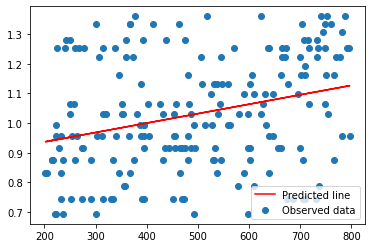

In [ ]:
# Regression Line
plt.scatter(sg.SAT_Scores, np.log(sg.GPA))
plt.plot(sg.SAT_Scores, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [ ]:
# Error calculation
res3 = sg.GPA - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

0.5175875893834133

In [ ]:
#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(GPA) ~ SAT_Scores + I(SAT_Scores*SAT_Scores)', data = sg).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     10.23
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           5.95e-05
Time:                        10:58:31   Log-Likelihood:                 59.448
No. Observations:                 200   AIC:                            -112.9
Df Residuals:                     197   BIC:                            -103.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.0056      0.110      9.112      0.000       0.788       1.223
SAT_Scores                    -0.0003      0.000     -0.607      0.545      -0.001       0.001
I(SAT_Scores * SAT_Scores)  6.142e-07   4.79e-07      1.284      0.201    -3.3e-07    1.56e-06
==============================================================================
Omnibus:                        8.598   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                4.118
Skew:                           0.046   Prob(JB):                        0.128
Kurtosis:                       2.303   Cond. No.                     2.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred4 = model4.predict(pd.DataFrame(sg))
pred4_at = np.exp(pred4)
pred4_at

0      2.641946
1      2.641231
2      3.040712
3      2.837523
4      2.685642
         ...   
195    2.762567
196    2.726333
197    2.966451
198    3.085089
199    2.641076
Length: 200, dtype: float64

In [ ]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = sg.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values

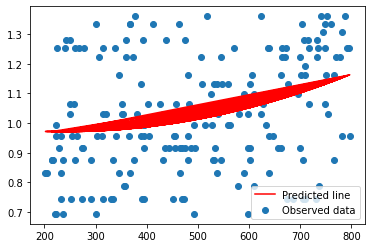

In [ ]:
plt.scatter(sg.SAT_Scores, np.log(sg.GPA))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [ ]:
# Error calculation
res4 = sg.GPA - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

0.5144912487745277

In [ ]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,0.515946
1,Log model,0.518490
2,Exp model,0.517588
3,Poly model,0.514491


In [ ]:
###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(sg, test_size = 0.2)

finalmodel = smf.ols('np.log(GPA) ~ SAT_Scores + I(SAT_Scores*SAT_Scores)', data = train).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7.375
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           0.000869
Time:                        11:00:01   Log-Likelihood:                 50.110
No. Observations:                 160   AIC:                            -94.22
Df Residuals:                     157   BIC:                            -85.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.9951      0.119      8.373      0.000       0.760       1.230
SAT_Scores                    -0.0002      0.001     -0.334      0.739      -0.001       0.001
I(SAT_Scores * SAT_Scores)  4.886e-07   5.31e-07      0.920      0.359    -5.6e-07    1.54e-06
==============================================================================
Omnibus:                        7.922   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.639
Skew:                           0.021   Prob(JB):                        0.162
Kurtosis:                       2.262   Cond. No.                     2.64e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_GPA = np.exp(test_pred)
pred_test_GPA

2      3.065913
52     2.812070
93     2.685565
36     2.746777
47     2.829096
186    2.681910
86     2.961036
138    2.674300
114    2.698910
56     3.054741
179    2.776156
134    2.942494
144    2.953006
136    3.177011
167    2.763848
122    2.707729
76     2.983070
95     2.723666
176    2.670495
92     2.829096
129    2.721398
102    3.117674
70     2.771453
25     2.693845
149    2.901443
41     3.087160
55     3.151291
98     3.205482
1      2.664252
164    2.914718
112    2.682551
53     3.117674
101    2.815768
105    2.773791
31     2.860783
58     2.769909
120    3.156734
68     3.001646
130    3.119406
77     2.695908
dtype: float64

In [ ]:
# Model Evaluation on Test data
test_res = test.GPA - pred_test_GPA
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

0.5267967075719604

In [ ]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_GPA = np.exp(train_pred)
pred_train_GPA

108    2.664531
40     2.683864
107    2.671752
142    2.667932
24     2.890881
         ...   
169    3.017843
7      2.703429
99     3.062702
194    2.664939
190    2.783409
Length: 160, dtype: float64

In [ ]:
# Model Evaluation on train data
train_res = train.GPA - pred_train_GPA
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

0.5093263283804897

In [ ]:
Result : This Model is not the best fit.